In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sn

In [3]:
churn_df = pd.read_csv('data/ChurnData.csv')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null float64
pager       200 non-null float64
internet    200 non-null float64
callwait    200 non-null float64
confer      200 non-null float64
ebill       200 non-null float64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null float64
chur

In [5]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


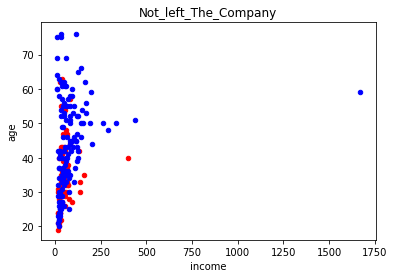

In [7]:
ax = churn_df[churn_df['churn'] == 1].plot(kind = 'scatter', x = 'income', y = 'age', color = 'red', title = 'Company_Left')
churn_df[churn_df['churn'] == 0].plot(kind = 'scatter', x = 'income', y = 'age', color = 'blue', title = 'Not_left_The_Company', ax = ax)
plt.show()

In [8]:
x = np.array(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.,   1.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.,   0.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.,   0.]])

In [9]:
y = np.array(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [10]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148,  1.56469673],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673, -0.63910148],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148, -0.63910148]])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 4)

In [12]:
x_train.shape

(160, 10)

In [13]:
x_test.shape

(40, 10)

In [14]:
y_train.shape

(160,)

In [15]:
y_test.shape

(40,)

In [16]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver = 'lbfgs', max_iter = 1000, C = 0.01)
regr.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_test[0:5]

array([0, 0, 1, 0, 1])

In [18]:
yhat = regr.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [20]:
a_1 = regr.score(x_train, y_train)

In [21]:
a_2 = regr.score(x_test, y_test)

In [22]:
a_3 = regr.score(x_test, yhat)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, jaccard_similarity_score
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       1.00      0.33      0.50        15

    accuracy                           0.75        40
   macro avg       0.86      0.67      0.67        40
weighted avg       0.82      0.75      0.71        40



In [24]:
a_4 = accuracy_score(y_test, yhat)

In [25]:
a_5 = jaccard_similarity_score(y_test, yhat)

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [26]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [28]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [29]:
b_1 = knn.score(x_train, y_train)
b_1

1.0

In [30]:
b_2 = knn.score(x_test, y_test)
b_2

0.975

In [31]:
b_3 = knn.score(x_test, y_pred)
b_3

1.0

In [32]:
b_4 = accuracy_score(y_test, y_pred)
b_4

0.975

In [33]:
b_5 = jaccard_similarity_score(y_test, y_pred)
b_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.975

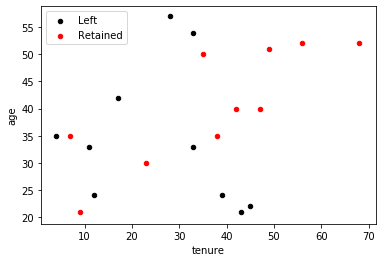

In [34]:
ax = churn_df[churn_df['churn'] == 1][0:10].plot(kind = 'scatter', x = 'tenure', y = 'age', color = 'k', label = 'Left')
churn_df[churn_df['churn'] == 0][0:10].plot(kind = 'scatter', x = 'tenure', y = 'age', color = 'red', label = 'Retained', ax =ax)

In [35]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly', gamma = 'auto')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [37]:
yhat_1 = clf.predict(x_test)
yhat_1

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [38]:
c_1 = clf.score(x_train, y_train)
c_1

1.0

In [39]:
c_2 = clf.score(x_test, y_test)
c_2

0.925

In [40]:
c_3 = clf.score(x_test, yhat_1)
c_3

1.0

In [41]:
c_4 = accuracy_score(y_test, yhat_1)
c_4

0.925

In [42]:
c_5 = jaccard_similarity_score(y_test, yhat_1)
c_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.925

In [43]:
from sklearn import tree
clf_1 = tree.DecisionTreeClassifier()
clf_1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [45]:
ypred_1 = clf_1.predict(x_test)
ypred_1

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [46]:
d_1 = clf_1.score(x_train, y_train)
d_1

1.0

In [47]:
d_2 = clf_1.score(x_test, y_test)
d_2

1.0

In [48]:
d_3 = clf.score(x_test, ypred_1)
d_3

0.925

In [49]:
d_4 = accuracy_score(y_test, ypred_1)
d_4

1.0

In [50]:
d_5 = jaccard_similarity_score(y_test, ypred_1)
d_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

In [51]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 1000)
cl.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_test[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [53]:
yhat_2 = cl.predict(x_test)
yhat_2[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [54]:
e_1 = cl.score(x_train, y_train)
e_1

1.0

In [55]:
e_2 = cl.score(x_test, y_test)
e_2

1.0

In [56]:
e_3 = cl.score(x_test, yhat_2)
e_3

1.0

In [57]:
e_4 = accuracy_score(y_test, yhat_2)
e_4

1.0

In [58]:
e_5 = jaccard_similarity_score(y_test, yhat_2)
e_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [60]:
gsn = GaussianNB()
gsn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
y_test[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [62]:
ypred_2 = gsn.predict(x_test)
ypred_2[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [63]:
f_1 = gsn.score(x_train, y_train)
f_1

1.0

In [64]:
f_2 = gsn.score(x_test, y_test)
f_2

1.0

In [65]:
f_3 = gsn.score(x_test, ypred_2)
f_3

1.0

In [66]:
f_4 = accuracy_score(y_test, ypred_2)
f_4

1.0

In [67]:
f_5 = jaccard_similarity_score(y_test, ypred_2)
f_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

In [68]:
mul = MultinomialNB()
mul.fit(x_train, y_train)

ValueError: Input X must be non-negative

In [69]:
g_1 = np.nan
g_1

nan

In [70]:
g_2 = np.nan
g_2

nan

In [71]:
g_3 = np.nan
g_3

nan

In [72]:
g_4 = np.nan
g_4

nan

In [73]:
g_5 = np.nan
g_5

nan

In [74]:
ber = BernoulliNB()
ber.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [75]:
y_test[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [76]:
yhat_2 = ber.predict(x_test)
yhat_2[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [77]:
h_1 = ber.score(x_train, y_train)
h_1

0.99375

In [78]:
h_2 = ber.score(x_test, y_test)
h_2

1.0

In [79]:
h_3 = ber.score(x_test, yhat_2)
h_3

1.0

In [80]:
h_4 = accuracy_score(y_test, yhat_2)
h_4

1.0

In [81]:
h_5 = jaccard_similarity_score(y_test, yhat_2)
h_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

In [83]:
df = pd.DataFrame({'Training Score' : [a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1],
                  'Testing Score' : [a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2],
                  'Predicted Score' : [a_3, b_3, c_3, d_3, e_3, f_3, g_3, h_3],
                  'Accuracy Score' : [a_4, b_4, c_4, d_4, e_4, f_4, g_4, h_4],
                  'Jaccard Similarity Score' : [a_5, b_5, c_5, d_5, e_5, f_5, g_5, h_5]}, index = ['Logistic', 'KNN', 'SVM', 'Decsion_Tree', 'Random_Forest', 'GaussianNB', 'MultinomialNB', 'BernoulliNB'])
df

,Training Score,Testing Score,Predicted Score,Accuracy Score,Jaccard Similarity Score
Logistic,0.88125,0.750,1.000,0.750,0.750
KNN,1.00000,0.975,1.000,0.975,0.975
SVM,1.00000,0.925,1.000,0.925,0.925
Decsion_Tree,1.00000,1.000,0.925,1.000,1.000
Random_Forest,1.00000,1.000,1.000,1.000,1.000
GaussianNB,1.00000,1.000,1.000,1.000,1.000
MultinomialNB,NaN,NaN,NaN,NaN,NaN
BernoulliNB,0.99375,1.000,1.000,1.000,1.000
